# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Load Climate Change Datasets

In [2]:
global_temp = pd.read_csv("GlobalTemperatures.csv")

In [3]:
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
global_temp.shape

(3192, 9)

In [5]:
gt_state = pd.read_csv("GlobalLandTemperaturesByState.csv")

In [6]:
gt_state.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [7]:
gt_state.shape

(645675, 5)

In [8]:
gt_major_city = pd.read_csv("GlobalLandTemperaturesByMajorCity.csv")

In [9]:
gt_major_city.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [10]:
gt_major_city.shape

(239177, 7)

In [11]:
gt_country = pd.read_csv("GlobalLandTemperaturesByCountry.csv")

In [12]:
gt_country.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [13]:
gt_country.shape

(577462, 4)

In [14]:
gt_city = pd.read_csv("GlobalLandTemperaturesByCity.csv")

In [15]:
gt_city.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [16]:
gt_city.shape

(8599212, 7)

# EDA

In [17]:
gt_city.loc[(gt_city['Country']=="Côte D'Ivoire") & (gt_city['dt']=="1849-01-01") & (gt_city['City']=="Abidjan")]

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
43553,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W


* #### This mean the gt_city has the same data as gt_major_city

### **NOTE** : As gt_city data and gt_major_city are nearly the same, but gt_city is larger so we will use it. 

In [18]:
df = gt_city.copy()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   dt                             object 
 1   AverageTemperature             float64
 2   AverageTemperatureUncertainty  float64
 3   City                           object 
 4   Country                        object 
 5   Latitude                       object 
 6   Longitude                      object 
dtypes: float64(2), object(5)
memory usage: 459.2+ MB


In [20]:
df.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,8.235082e+06,8.235082e+06
mean,1.672743e+01,1.028575e+00
std,1.035344e+01,1.129733e+00
min,-4.270400e+01,3.400000e-02
25%,1.029900e+01,3.370000e-01
50%,1.883100e+01,5.910000e-01
75%,2.521000e+01,1.349000e+00
max,3.965100e+01,1.539600e+01


In [21]:
df["Country"].nunique()

159

In [22]:
df["City"].nunique()

3448

In [23]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [24]:
c = df.groupby('Country').mean()

In [25]:
c

,AverageTemperature,AverageTemperatureUncertainty
Country,,
Afghanistan,13.816497,0.951639
Albania,15.525828,1.493446
Algeria,17.763206,1.490964
Angola,21.759716,0.867555
Argentina,16.999216,0.728985
...,...,...
Venezuela,25.482422,0.709350
Vietnam,24.846825,0.687817
Yemen,25.768408,0.958633


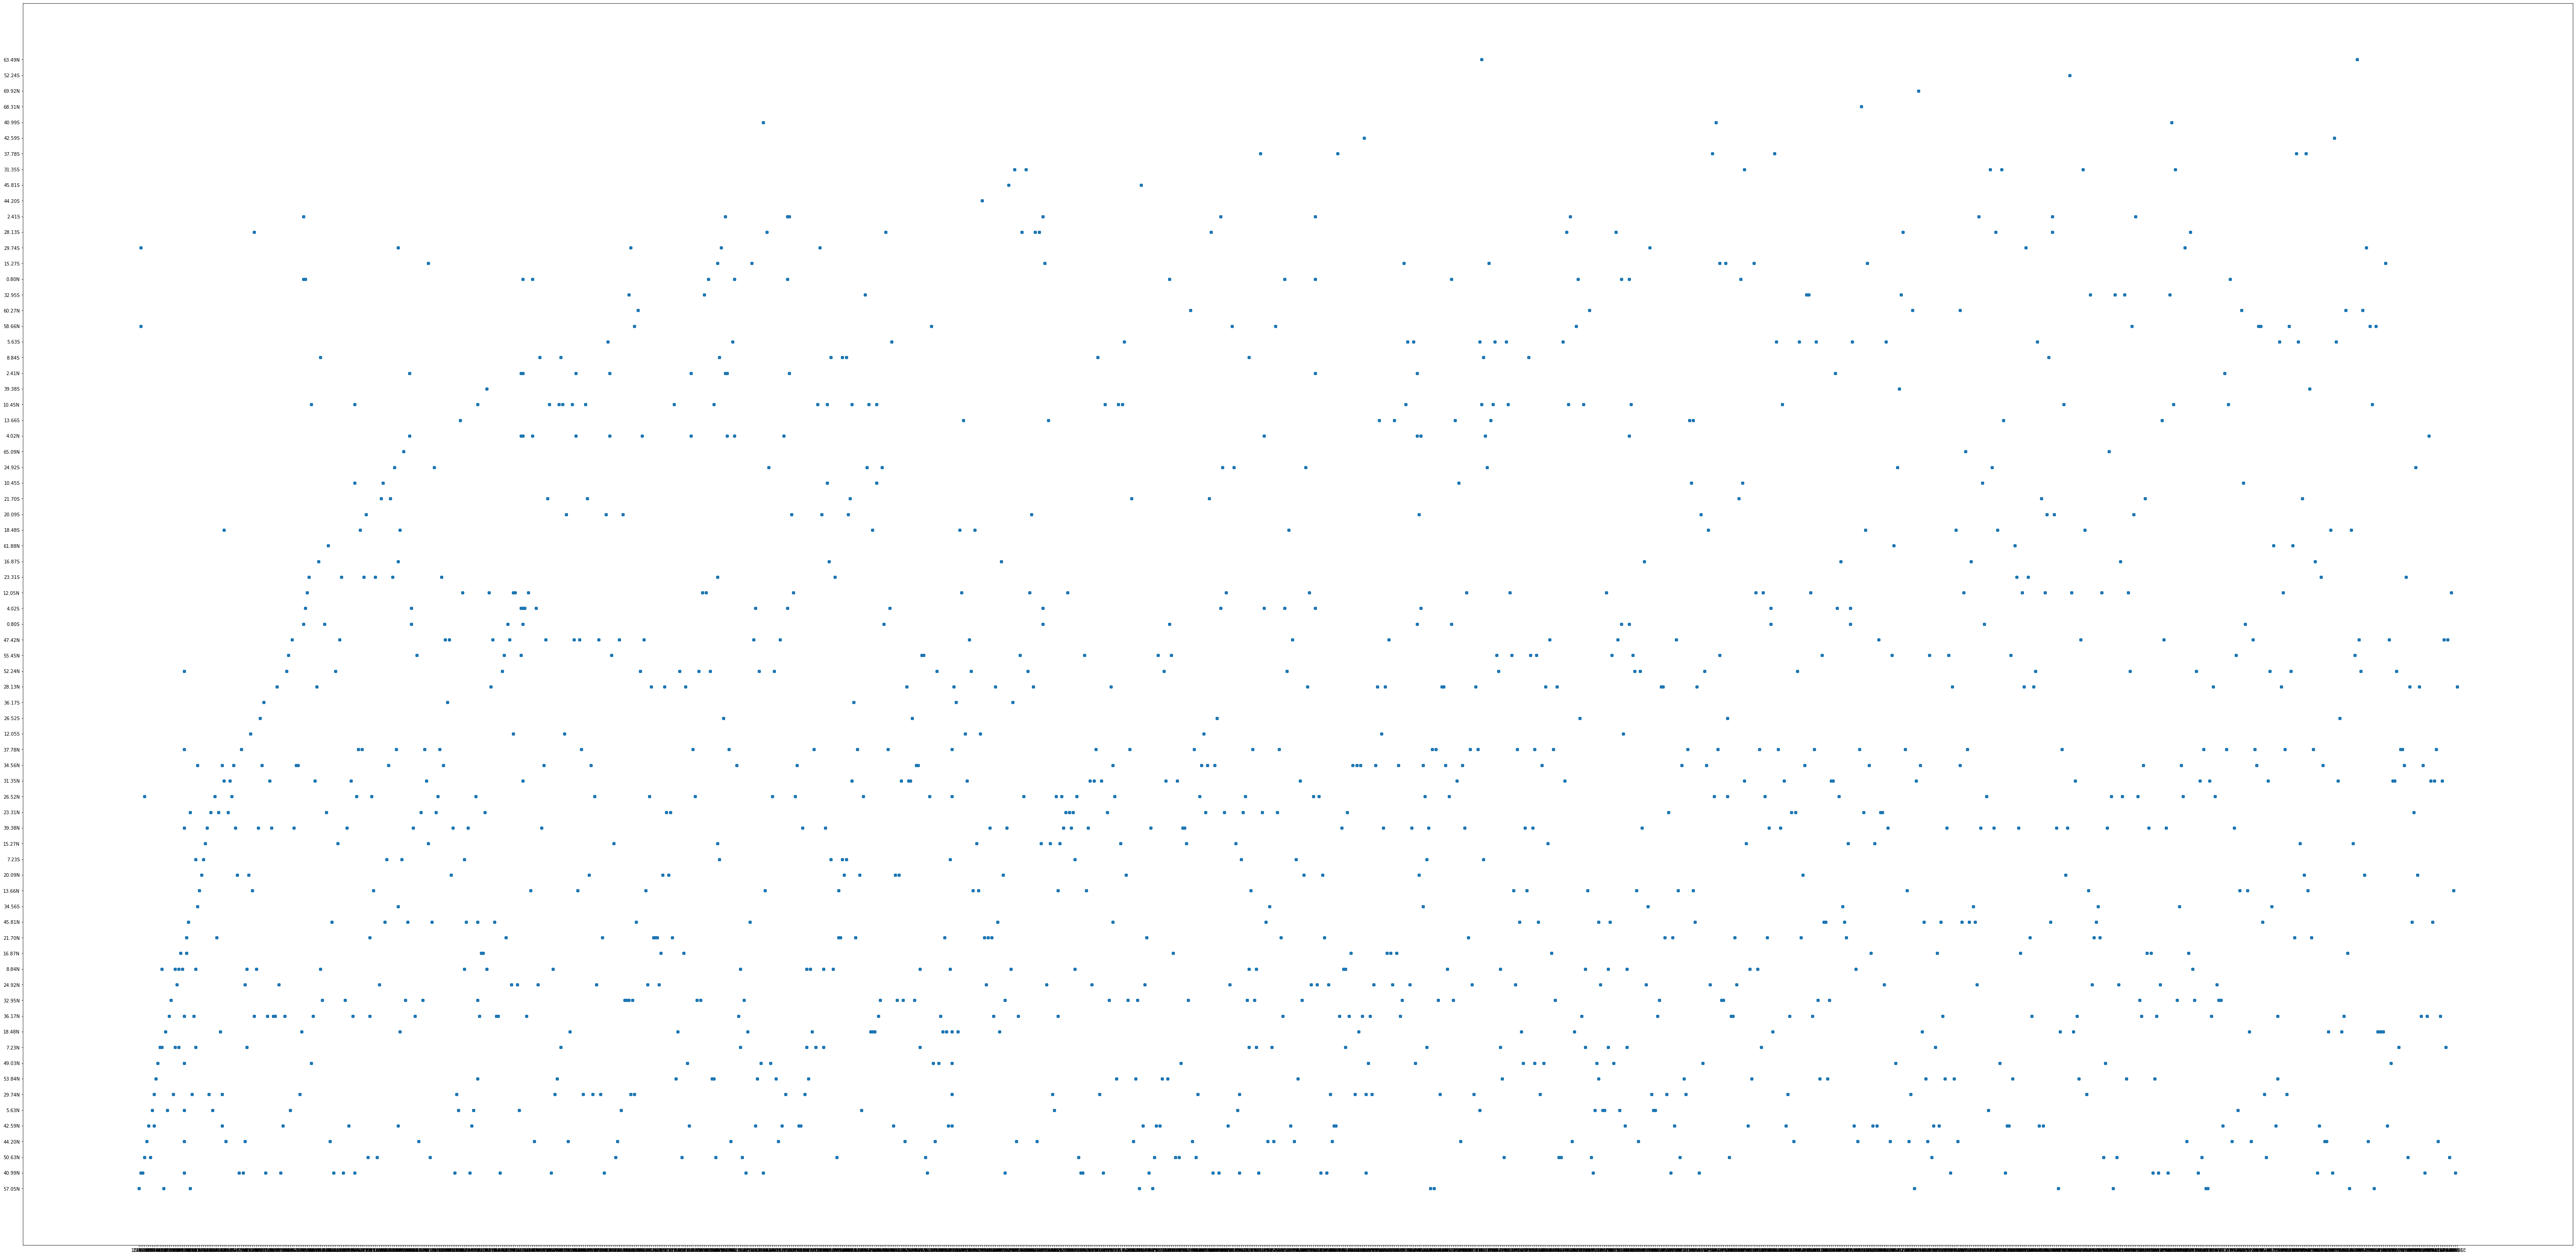

In [53]:
plt.scatter(x= df["Longitude"],y = df["Latitude"])
plt.rcParams["figure.figsize"] = (100,100)
plt.show()